C:\Users\Himanshu Sardana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


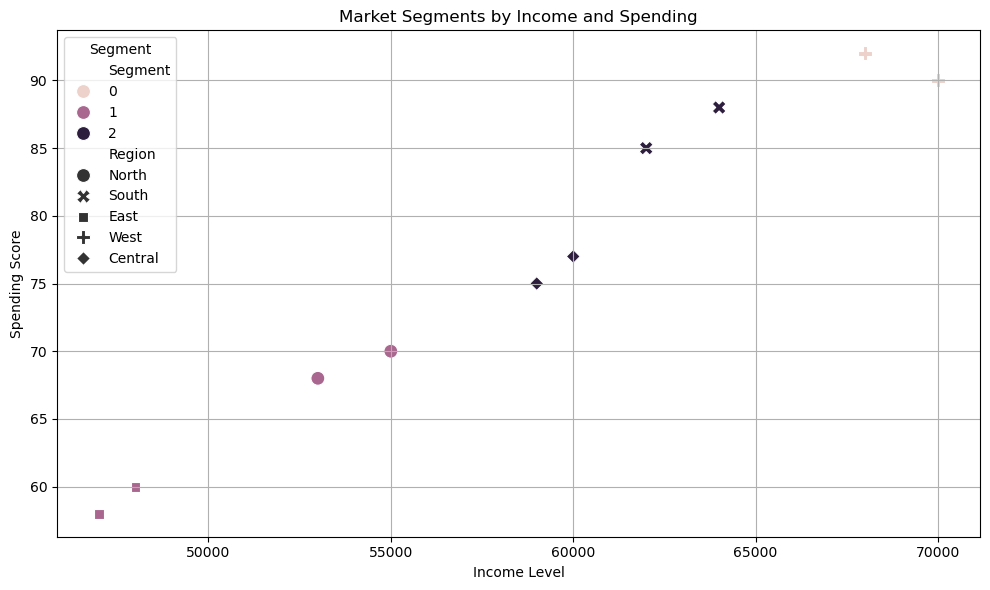

    Region  Age  IncomeLevel PreferredProduct  SpendingScore  Segment
0    North   35        55000      Electronics             70        1
1    South   42        62000        Groceries             85        2
2     East   29        48000         Clothing             60        1
3     West   50        70000        Furniture             90        0
4  Central   38        59000        Groceries             75        2
5    North   33        53000      Electronics             68        1
6    South   45        64000        Groceries             88        2
7     East   31        47000         Clothing             58        1
8     West   48        68000        Furniture             92        0
9  Central   36        60000        Groceries             77        2


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create synthetic dataset
data = {
    'Region': ['North', 'South', 'East', 'West', 'Central', 'North', 'South', 'East', 'West', 'Central'],
    'Age': [35, 42, 29, 50, 38, 33, 45, 31, 48, 36],
    'IncomeLevel': [55000, 62000, 48000, 70000, 59000, 53000, 64000, 47000, 68000, 60000],
    'PreferredProduct': ['Electronics', 'Groceries', 'Clothing', 'Furniture', 'Groceries',
                         'Electronics', 'Groceries', 'Clothing', 'Furniture', 'Groceries'],
    'SpendingScore': [70, 85, 60, 90, 75, 68, 88, 58, 92, 77]
}
df = pd.DataFrame(data)

# Step 2: Preprocessing
categorical_features = ['Region', 'PreferredProduct']
numerical_features = ['Age', 'IncomeLevel', 'SpendingScore']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

# Step 3: Clustering Pipeline
pipeline = Pipeline([
    ('prep', preprocessor),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

# Step 4: Fit and Predict
df['Segment'] = pipeline.fit_predict(df)

# Step 5: Visualize Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='IncomeLevel', y='SpendingScore', hue='Segment', style='Region', s=100)
plt.title('Market Segments by Income and Spending')
plt.xlabel('Income Level')
plt.ylabel('Spending Score')
plt.legend(title='Segment')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: View segmented data
print(df[['Region', 'Age', 'IncomeLevel', 'PreferredProduct', 'SpendingScore', 'Segment']])